In [2]:
import pandas as pd
import spacy
import json
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [3]:
# import all the dataset into dataframe
df_2012=pd.read_excel("2012complete.xlsx")
df_2013=pd.read_excel("2013complete.xlsx")
df_2014=pd.read_excel("2014complete.xlsx")
df_2015=pd.read_excel("2015complete.xlsx")
df_2016=pd.read_excel("2016complete.xlsx")
df_2017=pd.read_excel("2017complete.xlsx")
df_2018=pd.read_excel("2018complete.xlsx")
df_2019=pd.read_excel("2019complete.xlsx")
df_2020=pd.read_excel("2020complete.xlsx")
df_2021=pd.read_excel("2021complete.xlsx")
df_2022=pd.read_excel("2022complete.xlsx")

In [4]:
# concatenate all the datafram
join_df=pd.concat([df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021,df_2022], ignore_index=True)

In [5]:
# print the first five rows of the dataframe
join_df.head()

,case number,Date of the judgement,judge one,judge two,judge3 three,Appellant,Respondent,appeal from,judge one conclusion,judge two conclusion,judge three conclusion,length of judgement,full judgement
0,C1/2011/0694,12th January 2012,LORD JUSTICE WARD,none,none,The Queen on the application of JBol Limited,The Health Protection Agency,QUEEN'S BENCH DIVISIONADMINISTRATIVE COURTMR ...,I appreciate how important this case is for th...,none,none,20110,Lord Justice Ward:This is a renewed applicatio...
1,B3/2010/2462,20/01/2012,LORD JUSTICE GROSS,MR JUSTICE MANN,SIR STEPHEN SEDLEY,Charnock & Ors,Rowan & Ors,HHJ Gore QC7LV18468 / 8LV12546,It may be said that this reverses the notice r...,I agree.,I also agree.,22963,Sir Stephen Sedley:On 30 June 2007 in Ullet Ro...
2,B2/2011/0663,18 January 2012,LORD JUSTICE GROSS,MR JUSTICE MANN,SIR STEPHEN SEDLEY,GARY TAYLOR,(1) TERENCE LAMBERT\n(2) MICHELLE LAMBERT,THE DONCASTER COUNTY COURTHIS HONOUR JUDGE MOORE,It may be said that this reverses the notice r...,I agree.,I also agree.,42643,Lord Justice Lloyd:IntroductionThis is an appe...
3,A3/2011/0526,18 January 2012,LORD JUSTICE MUMMERY,LORD JUSTICE JACKSON,LORD JUSTICE LEWISON,DANIEL THOMAS BRIAN HORLER,DAVID RUBIN & ORS,THE CHANCERY DIVISIONHis Honour Judge Raynor ...,As rules 8.1 (6) and 8.3 (6) make clear it is ...,I agree.,I also agree.,18105,Lord Justice Lewison:Mr Andrew Millar was adju...
4,A3/2011/0402,20/01/2012,LORD JUSTICE TOULSON,LORD JUSTICE ETHERTON,LORD JUSTICE KITCHIN,Apimed Medical Honey Limited\n(a company incor...,Brightwake Limited\n(trading as Advancis Medical),THE PATENTS COUNTY COURTHis Honour Judge Fysh...,The Comptroller served a respondent's notice b...,I agree,I also agree,40573,Lord Justice Kitchin:IntroductionThis is a dis...


In [6]:
# print last five row of the dataframe
join_df.tail()

,case number,Date of the judgement,judge one,judge two,judge3 three,Appellant,Respondent,appeal from,judge one conclusion,judge two conclusion,judge three conclusion,length of judgement,full judgement
2375,CA-2021-000657,16 May 2022,LORD JUSTICE LEWISON,LADY JUSTICE ASPLIN,LORD JUSTICE EDIS,(1) THE SECRETARY OF STATE FOR TRANSPORT\n(2) ...,ELLIOTT CUCIUREAN,THE HIGH COURT OF JUSTICECHANCERY DIVISIONBIR...,"""…requires an appellate court to exercise a de...",I agree.,I also agree.,54014,This judgment was handed down remotely by circ...
2376,CA-2021-000722 (Formerly C1/2021/1474),17 May 2022,LORD JUSTICE DINGEMANS,LADY JUSTICE ANDREWS,LADY JUSTICE ELISABETH LAING,THE QUEEN (on the application of [KALONGA]),LONDON BOROUGH OF CROYDON,THE HIGH COURT OF JUSTICEQUEEN'S BENCH DIVISI...,The review of its decision which the local aut...,"For those reasons, which accord with those exp...",I agree with both judgments.,66131,This judgment was handed down remotely by circ...
2377,CA-2021-003286/7,17/05/2022,LORD JUSTICE COULSON,LORD JUSTICE ARNOLD,LORD JUSTICE PHILLIPS,(1) Mrs Iman Said Abdul Al-Rawas\n(2) Mr Thame...,(1) Hassan Khan & Co (A Firm)\n(2) The Khan Pa...,THE QUEENS BENCH DIVISIONMr Justice Morris[20...,"For all these reasons, therefore, I consider t...",I agree.,I also agree.,19604,This judgment will be handed down remotely by ...
2378,CA-2021-001412,19/05/2022,LORD JUSTICE PETER JACKSON,LADY JUSTICE SIMLER,LADY JUSTICE ANDREWS,YZ,THE CHIEF CONSTABLE OF SOUTH WALES POLICE,THE HIGH COURT OF JUSTICEQUEEN'S BENCH DIVISI...,GROUND 4 Ground 4 adds nothing to the other gr...,I agree.,I also agree.,51074,This judgment was handed down by the Judge rem...
2379,CA-2022-000413,27 May 2022,LORD JUSTICE NEWEY,LORD JUSTICE ARNOLD,LORD JUSTICE BIRSS,(1) NEURIM PHARMACEUTICALS (1991) LIMITED\n(2)...,(1) GENERICS (UK) LIMITED\n(2) VIATRIS UK HEAL...,"THE HIGHT COURT OF JUSTICE,BUSINESS AND PROPE...","Fourthly, the judge was entitled to reject Pro...",I agree.,I also agree.,44488,This judgment was handed down by the Court rem...


In [7]:
# print the summary of the dataframe
join_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   case number             2380 non-null   object
 1   Date of the judgement   2380 non-null   object
 2   judge one               2380 non-null   object
 3   judge two               2380 non-null   object
 4   judge3 three            2380 non-null   object
 5   Appellant               2380 non-null   object
 6   Respondent              2380 non-null   object
 7   appeal from             2380 non-null   object
 8   judge one conclusion    2380 non-null   object
 9   judge two conclusion    2380 non-null   object
 10  judge three conclusion  2380 non-null   object
 11  length of judgement     2380 non-null   int64 
 12  full judgement          2380 non-null   object
dtypes: int64(1), object(12)
memory usage: 241.8+ KB


The result above show the summary of the dataframe, we have about 1744 entries and 13 columns. Date of the judgement column is not in right data type. we will be dealing with this later, non of the column is having a missing values.

In [8]:
# check for missing values
join_df.isna().sum()

case number               0
Date of the judgement     0
judge one                 0
judge two                 0
judge3 three              0
Appellant                 0
Respondent                0
appeal from               0
judge one conclusion      0
judge two conclusion      0
judge three conclusion    0
length of judgement       0
full judgement            0
dtype: int64

In [9]:
# convert Date of the judgement from object to datetime
join_df["Date of the judgement"] =   pd.to_datetime(join_df["Date of the judgement"], errors='coerce')

In [10]:
# drop all the missing values
join_df.dropna(inplace=True)

In [11]:
# check for dupliacte
join_df.duplicated().sum()

116

In [12]:
# filter out duplicate entries
join_df[join_df.duplicated()].head(2)

,case number,Date of the judgement,judge one,judge two,judge3 three,Appellant,Respondent,appeal from,judge one conclusion,judge two conclusion,judge three conclusion,length of judgement,full judgement
806,C1/2013/2111,2014-05-01,LORD JUSTICE JACKSON,LORD JUSTICE PATTEN,SIR STANLEY BURNTON,The Queen on the application of DALE LEE-HIRONS,THE SECRETARY OF STATE FOR JUSTICE,THE HIGH COURT OF JUSTICEQUEEN'S BENCH DIVISI...,It follows that I would dismiss the appeal. As...,The next issue concerns the adequacy of the re...,I agree that the appeal should be dismissed fo...,57841,Sir Stanley Burnton :IntroductionThis is an ap...
2007,"B2/2018/1187, 1186 and 2581",2019-01-15,LORD JUSTICE PATTEN,LORD JUSTICE LEGGATT,LADY JUSTICE NICOLA DAVIES,HUGHES JARVIS LIMITED,DAVID SEARLE,THE COUNTY COURT AT OXFORDHH Judge Melissa Cl...,"Lord Justice Leggatt : When, as occasionally h...",Lady Justice Nicola Davies :,© Crown copyright,64551,Lord Justice Patten :These appeals are from va...


In [13]:
# remove all the duplicate
join_df.drop_duplicates(inplace=True)

In [14]:
# save the clean dataframe 
join_df_clean = join_df.copy()

In [15]:
# extract the hierarchy of the date
join_df_clean["year"]=join_df_clean["Date of the judgement"].dt.year # extract year
join_df_clean["month"]=join_df_clean["Date of the judgement"].dt.strftime('%b')  # extract month
join_df_clean["day"]=join_df_clean["Date of the judgement"].dt.strftime('%a')  # extract days
#join_df_clean["quarter"]=join_df_clean["Date of the judgement"].dt.strftime('Q%q')

In [16]:
# a function to remove unwanted prefix characters
dd = lambda x : x.removeprefix(":").strip()[:13]
# applying the function to case number column
join_df_clean["case number"]=join_df_clean["case number"].apply(dd)

# End of Preprocessing

In [17]:
# save the clean dataframe to an excel file
join_df_clean.to_excel("check.xlsx", index=False)

# EDA
Exploration Data Analysis

In [18]:
h=join_df_clean["judge one conclusion"][:800].to_frame(name="judge one conclusion")
# Create a list to store the combined text data
combined_data = []

# Iterate over the rows of the dataframe
for index, row in h.iterrows():
    text = row['judge one conclusion']
    combined_data.append(text)

# Convert the list to a JSON object
json_data = json.dumps(combined_data)

# Write the JSON object to a file
with open('data.txt', 'w') as file:
    file.write(json_data)

In [19]:
# read the save text file
with open('data.txt', 'r') as file:
    text=json.load(file)
text=" ".join(text)

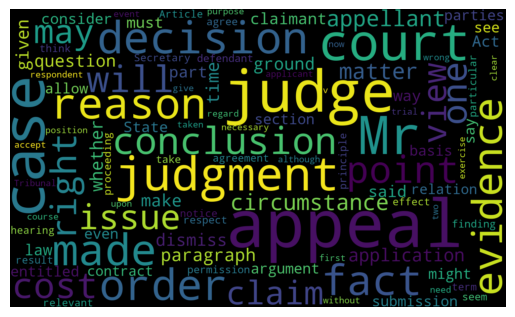

In [20]:
# plot the above analysis with wordClound
wordcloud = WordCloud(background_color = 'black', max_font_size = 200, max_words = 100, width = 1500,
                         height = 900, random_state=0).generate(text)

plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

From above wordcloud, it can be seen that. 
**Lord Justice, agree and appeal** are commonly used words

# What Month has highest count of court cases?

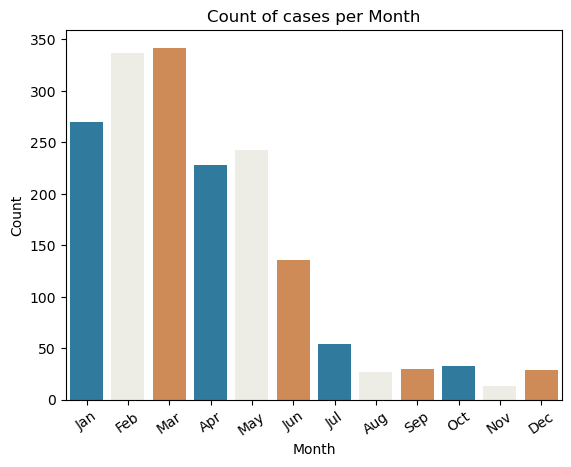

In [26]:
total_case_per_count=join_df_clean["month"].value_counts()
total_case_per_count=total_case_per_count.sort_index(key=lambda x: pd.to_datetime(x, format="%b"))
sns.barplot(x=total_case_per_count.index, y=total_case_per_count.values,
                                                     palette=["#1e81b0", "#eeeee4", "#e28743"])
plt.title("Count of cases per Month")
plt.ylabel("Count")
plt.xlabel("Month")
plt.xticks(rotation=35)
plt.show()